In [1]:
# Tune hyperparameter and make necessary addition to the baseline model to improve validation accuracy
# Provide logical description of which steps lead to improved response and what was its impact on architecture behavior
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
val_accuracy = grid_search.score(X_val, y_val)
print("Validation Accuracy:", val_accuracy)


Best hyperparameters: {'logisticregression__C': 1}
Validation Accuracy: 1.0


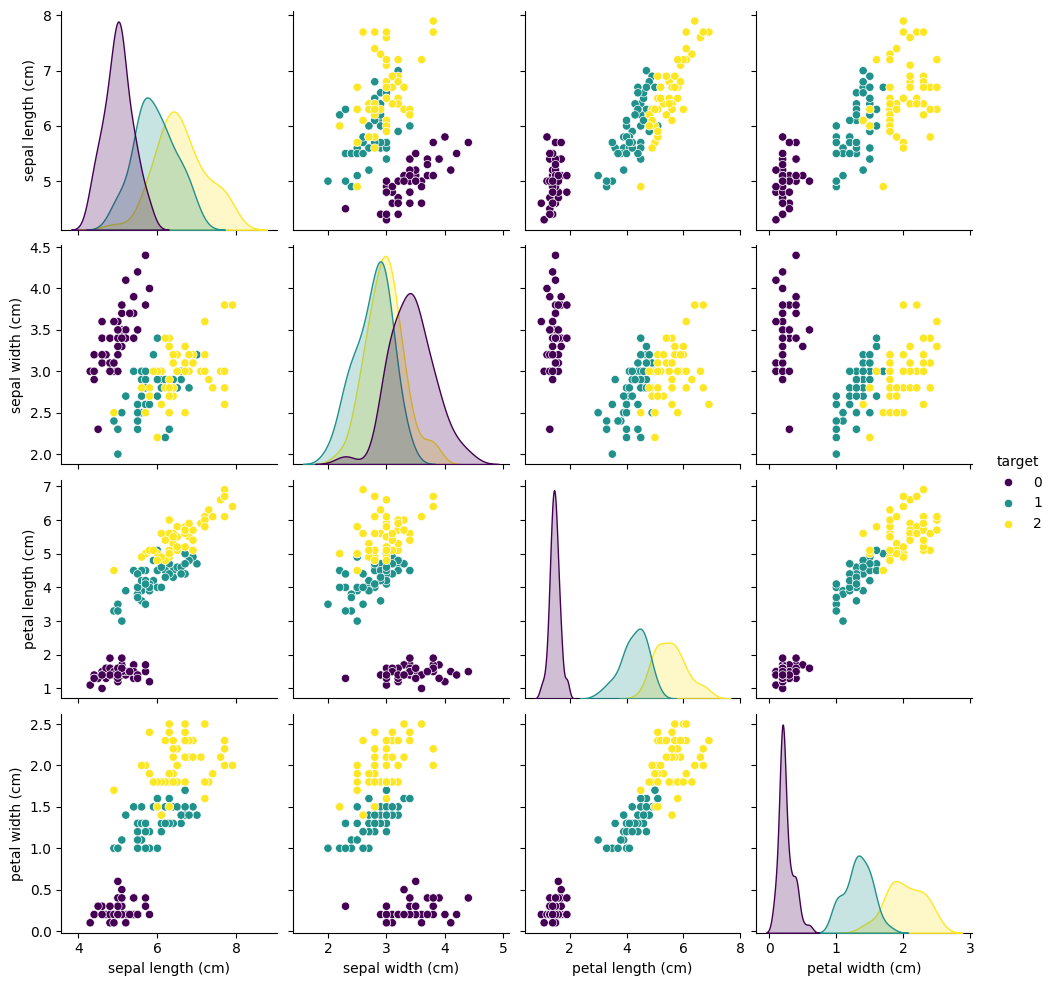

<ipython-input-2-bb3dcd4abe5b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='petal width (cm)', data=iris_df, palette='Set3')


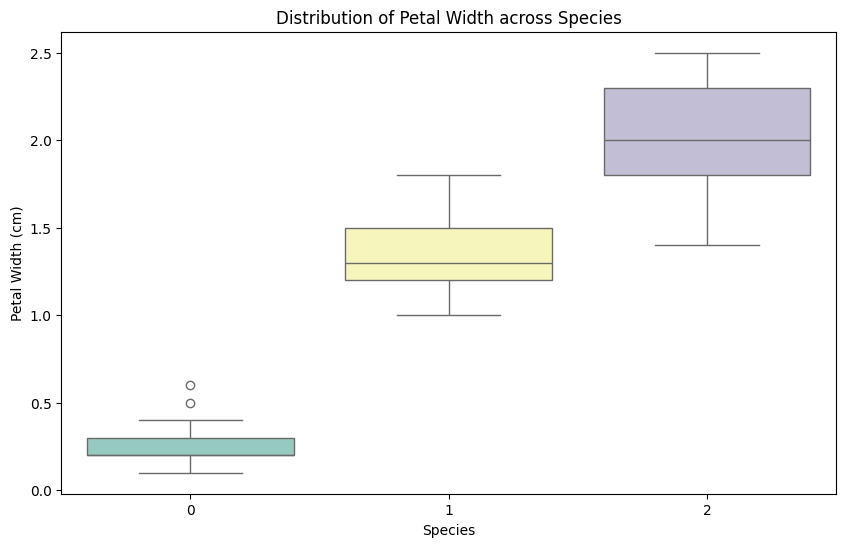

In [2]:
# Create at least two more visualizations using matplotlib (Other than provided in the source file)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
sns.pairplot(iris_df, hue='target', palette='viridis')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='petal width (cm)', data=iris_df, palette='Set3')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.title('Distribution of Petal Width across Species')
plt.show()


In [3]:
#Use dataset of your own choice and implement baseline models provided
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
y_pred = logistic_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)


Accuracy of Logistic Regression: 1.0


In [4]:
# Apply modified architecture to your own selected dataset and train it.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.1)
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print("Accuracy of Modified Neural Network:", accuracy)


Epoch 1/50
14/14 [==============================] - 1s 24ms/step - loss: 1.2456 - accuracy: 0.2222 - val_loss: 1.1874 - val_accuracy: 0.2500
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 1.1113 - accuracy: 0.5370 - val_loss: 1.0959 - val_accuracy: 0.5833
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 1.0083 - accuracy: 0.6389 - val_loss: 1.0114 - val_accuracy: 0.5000
Epoch 4/50
14/14 [==============================] - 0s 7ms/step - loss: 0.9016 - accuracy: 0.6111 - val_loss: 0.9270 - val_accuracy: 0.4167
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 0.7895 - accuracy: 0.7130 - val_loss: 0.8430 - val_accuracy: 0.6667
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.7963 - val_loss: 0.7710 - val_accuracy: 0.5833
Epoch 7/50
14/14 [==============================] - 0s 6ms/step - loss: 0.5959 - accuracy: 0.8056 - val_loss: 0.7160 - val_accuracy: 0.5833
Epoch 8/50
14/14 [=

In [5]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print("Accuracy on Testing Set:", accuracy)


1/1 [==============================] - 0s 30ms/step - loss: 0.1145 - accuracy: 0.9667
Accuracy on Testing Set: 0.9666666388511658


In [6]:
# Saving the  the model and printing the first few predictions
model.save("improved_iris_model.h5")
from tensorflow.keras.models import load_model
saved_model = load_model("improved_iris_model.h5")
predictions = saved_model.predict(X_test_scaled)
print("Predictions:")
print(predictions[:5])



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 109ms/step
Predictions:
[[8.2448479e-03 8.4103060e-01 1.5072441e-01]
 [9.9817747e-01 1.8103761e-03 1.2092532e-05]
 [5.2702562e-09 4.0249103e-03 9.9597496e-01]
 [2.1910053e-03 6.3442844e-01 3.6338055e-01]
 [1.3647502e-03 7.0741940e-01 2.9121581e-01]]


False
1/1 [==============================] - 0s 103ms/step


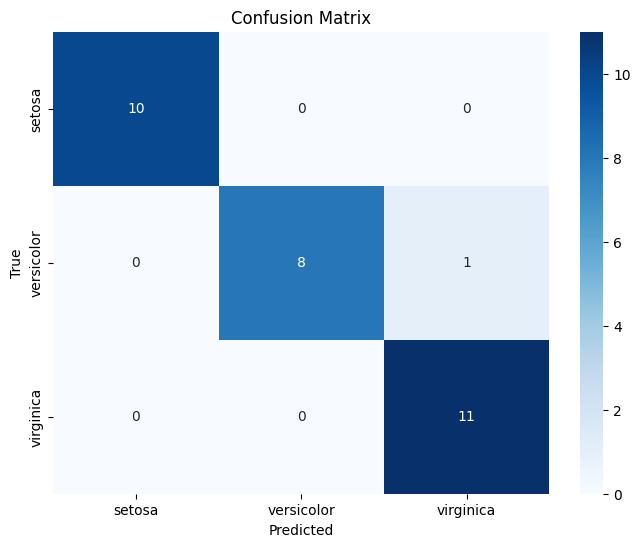

In [7]:
# plot of confusion matric
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
print(hasattr(model, 'predict_classes'))
y_pred = model.predict(X_test_scaled).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
class_names = iris.target_names
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Epoch 1/50
14/14 [==============================] - 0s 10ms/step - loss: 0.1176 - accuracy: 0.9630 - val_loss: 0.3568 - val_accuracy: 0.9167
Epoch 2/50
14/14 [==============================] - 0s 7ms/step - loss: 0.1168 - accuracy: 0.9630 - val_loss: 0.3629 - val_accuracy: 0.9167
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.1117 - accuracy: 0.9630 - val_loss: 0.3750 - val_accuracy: 0.9167
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 0.1104 - accuracy: 0.9630 - val_loss: 0.3735 - val_accuracy: 0.9167
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 0.1069 - accuracy: 0.9630 - val_loss: 0.3723 - val_accuracy: 0.9167
Epoch 6/50
14/14 [==============================] - 0s 6ms/step - loss: 0.1032 - accuracy: 0.9630 - val_loss: 0.3743 - val_accuracy: 0.9167
Epoch 7/50
14/14 [==============================] - 0s 7ms/step - loss: 0.1013 - accuracy: 0.9630 - val_loss: 0.3844 - val_accuracy: 0.9167
Epoch 8/50
14/14 [=

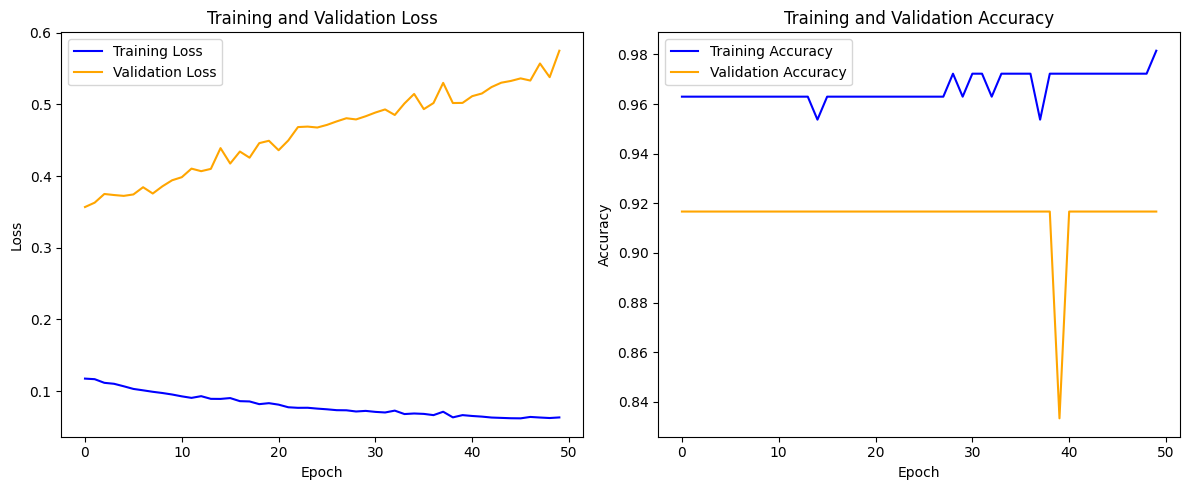

In [8]:
# Training and testing Loss and accuracy plots in one plot using subplot command and history object
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 25ms/step


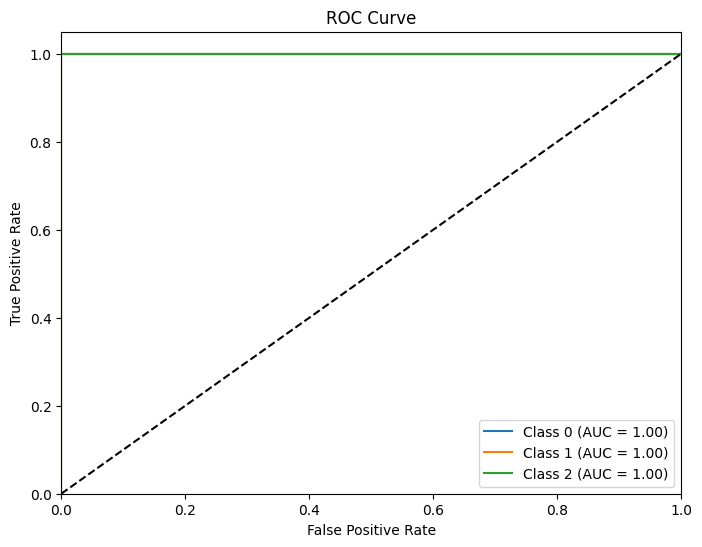

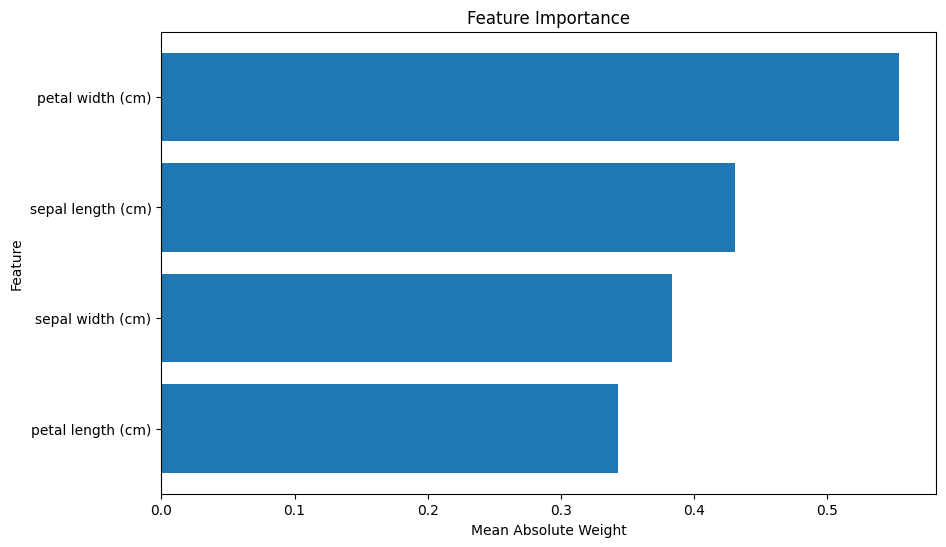

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
y_test_one_hot = label_binarize(y_test, classes=[0, 1, 2])
y_probs = model.predict(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

first_layer_weights = model.layers[0].get_weights()[0]
importances = np.mean(np.abs(first_layer_weights), axis=1)
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train_scaled.shape[1]), [iris.feature_names[i] for i in indices])
plt.xlabel("Mean Absolute Weight")
plt.ylabel("Feature")
plt.show()
